In [0]:
# standart data tools
import numpy as np
import pandas as pd

# common visualizing tools
import matplotlib.pyplot as plt
import seaborn as sns

# CNN layers and the Deep Learning model
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense , Flatten, Dropout
from keras.optimizers import Adam

# splitting tool for the validation set
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# to block unnecesarry warnings for updates etc.
import warnings
warnings.filterwarnings("ignore")

In [0]:
X = np.load("X.npy")
Y = np.load("Y.npy")

In [0]:
print(" Max value of X: ",X.max())
print(" Min value of X: ",X.min())
print(" Shape of X: ",X.shape)

print("\n Max value of Y: ",Y.max())
print(" Min value of Y: ",Y.min())
print(" Shape of Y: ",Y.shape)

 Max value of X:  1.0
 Min value of X:  0.003921569
 Shape of X:  (2062, 64, 64)

 Max value of Y:  1.0
 Min value of Y:  0.0
 Shape of Y:  (2062, 10)


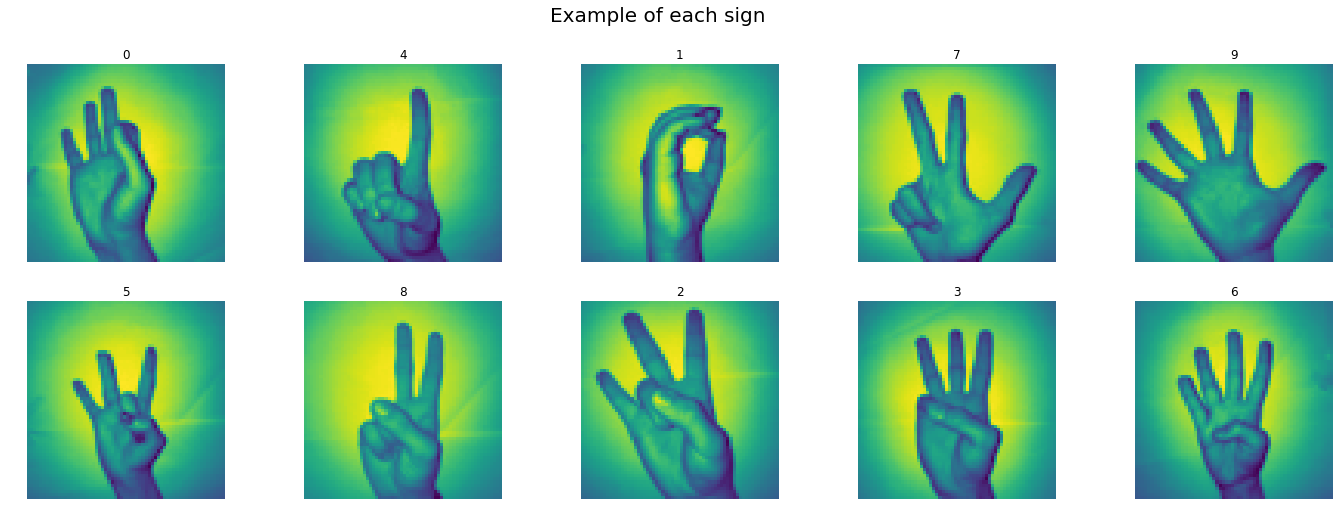

In [0]:
plt.figure(figsize=(24,8))

plt.subplot(2,5,1)
plt.title(Y[0].argmax())
plt.imshow(X[0])
plt.axis("off")

plt.subplot(2,5,2)
plt.title(Y[1000].argmax())
plt.imshow(X[1000])
plt.axis("off")

plt.subplot(2,5,3)
plt.title(Y[222].argmax())
plt.imshow(X[222])
plt.axis("off")

plt.subplot(2,5,4)
plt.title(Y[1500].argmax())
plt.imshow(X[1500])
plt.axis("off")

plt.subplot(2,5,5)
plt.title(Y[2000].argmax())
plt.imshow(X[2000])
plt.axis("off")

plt.subplot(2,5,6)
plt.title(Y[1200].argmax())
plt.imshow(X[1200])
plt.axis("off")

plt.subplot(2,5,7)
plt.title(Y[1700].argmax())
plt.imshow(X[1700])
plt.axis("off")

plt.subplot(2,5,8)
plt.title(Y[500].argmax())
plt.imshow(X[500])
plt.axis("off")

plt.subplot(2,5,9)
plt.title(Y[700].argmax())
plt.imshow(X[700])
plt.axis("off")

plt.subplot(2,5,10)
plt.title(Y[1400].argmax())
plt.imshow(X[1400])
plt.axis("off")

plt.suptitle("Example of each sign", fontsize=20)
plt.show()

In [0]:
x_9 = X[:204]; x_0 = X[204:409]; x_7 = X[409:615]; x_6 = X[615:822]; x_1 = X[822:1028]; 
x_8 = X[1028:1236]; x_4 = X[1236:1443]; x_3 = X[1443:1649]; x_2 = X[1649:1855]; x_5 = X[1855:];

In [0]:
mean0 = x_0.mean(axis=0); mean1 = x_1.mean(axis=0); mean2 = x_2.mean(axis=0);
mean3 = x_3.mean(axis=0); mean4 = x_4.mean(axis=0); mean5 = x_5.mean(axis=0);
mean6 = x_6.mean(axis=0); mean7 = x_7.mean(axis=0); mean8 = x_8.mean(axis=0); mean9 = x_9.mean(axis=0);

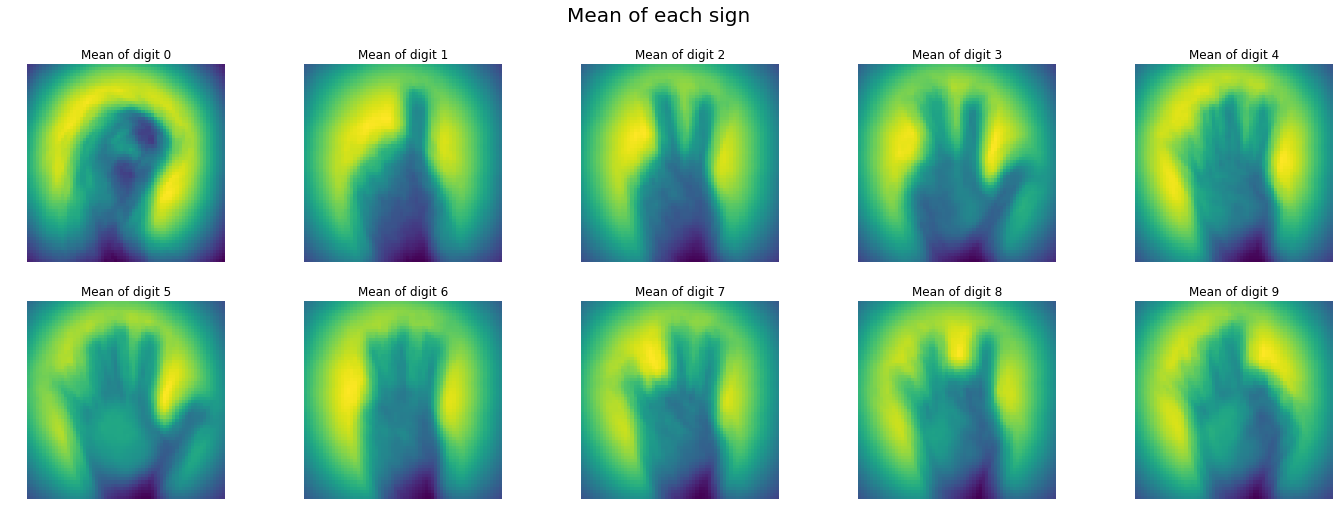

In [0]:
plt.figure(figsize=(24,8))

plt.subplot(2,5,1)
plt.title("Mean of digit 0")
plt.imshow(mean0)
plt.axis("off")

plt.subplot(2,5,2)
plt.title("Mean of digit 1")
plt.imshow(mean1)
plt.axis("off")

plt.subplot(2,5,3)
plt.title("Mean of digit 2")
plt.imshow(mean2)
plt.axis("off")

plt.subplot(2,5,4)
plt.title("Mean of digit 3")
plt.imshow(mean3)
plt.axis("off")

plt.subplot(2,5,5)
plt.title("Mean of digit 4")
plt.imshow(mean4)
plt.axis("off")

plt.subplot(2,5,6)
plt.title("Mean of digit 5")
plt.imshow(mean5)
plt.axis("off")

plt.subplot(2,5,7)
plt.title("Mean of digit 6")
plt.imshow(mean6)
plt.axis("off")

plt.subplot(2,5,8)
plt.title("Mean of digit 7")
plt.imshow(mean7)
plt.axis("off")

plt.subplot(2,5,9)
plt.title("Mean of digit 8")
plt.imshow(mean8)
plt.axis("off")

plt.subplot(2,5,10)
plt.title("Mean of digit 9")
plt.imshow(mean9)
plt.axis("off")

plt.suptitle("Mean of each sign", fontsize=20)
plt.show()

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)

In [0]:
CNN_model = Sequential()

CNN_model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",padding="same",input_shape=(64,64,1)))
CNN_model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",padding="same"))
CNN_model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))

CNN_model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"))
CNN_model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))

CNN_model.add(Conv2D(filters=32,kernel_size=(2,2),activation="relu",padding="same"))
CNN_model.add(MaxPooling2D(pool_size=(2,2),padding="same"))

CNN_model.add(Dropout(0.2))

CNN_model.add(Flatten())

CNN_model.add(Dense(128,activation="relu"))
CNN_model.add(Dense(64,activation="relu"))
CNN_model.add(Dense(40,activation="relu"))

CNN_model.add(Dense(10,activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
CNN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        416       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        16416     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
__________

In [0]:
CNN_model.compile(optimizer=Adam(lr=0.0002),loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

In [0]:
results = CNN_model.fit(x_train,y_train,epochs=70,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 1649 samples, validate on 413 samples
Epoch 1/70
1649/1649 [==============================] - 45s 28ms/step - loss: 2.3032 - acc: 0.1031 - val_loss: 2.3034 - val_acc: 0.0920
Epoch 2/70
1649/1649 [==============================] - 44s 27ms/step - loss: 2.3027 - acc: 0.0982 - val_loss: 2.3039 - val_acc: 0.0920
Epoch 3/70
1649/1649 [==============================] - 44s 27ms/step - loss: 2.3023 - acc: 0.1031 - val_loss: 2.3027 - val_acc: 0.0920
Epoch 4/70
1649/1649 [==============================] - 44s 27ms/step - loss: 2.2822 - acc: 0.1116 - val_loss: 2.2786 - val_acc: 0.0847
Epoch 5/70
1649/1649 [==============================] - 44s 27ms/step - loss: 1.8998 - acc: 0.2911 - val_loss: 1.2452 - val_acc: 0.6247
Epoch 6/70
1649/1649 [==============================] - 44s 27ms/step - loss: 1.3238 - acc: 0.5367 - val_loss: 0.9044 - val_acc: 0.7482
Epoch 7/70
1649/1649 [==============================] - 44s 27ms/step - loss: 0.9861 - ac

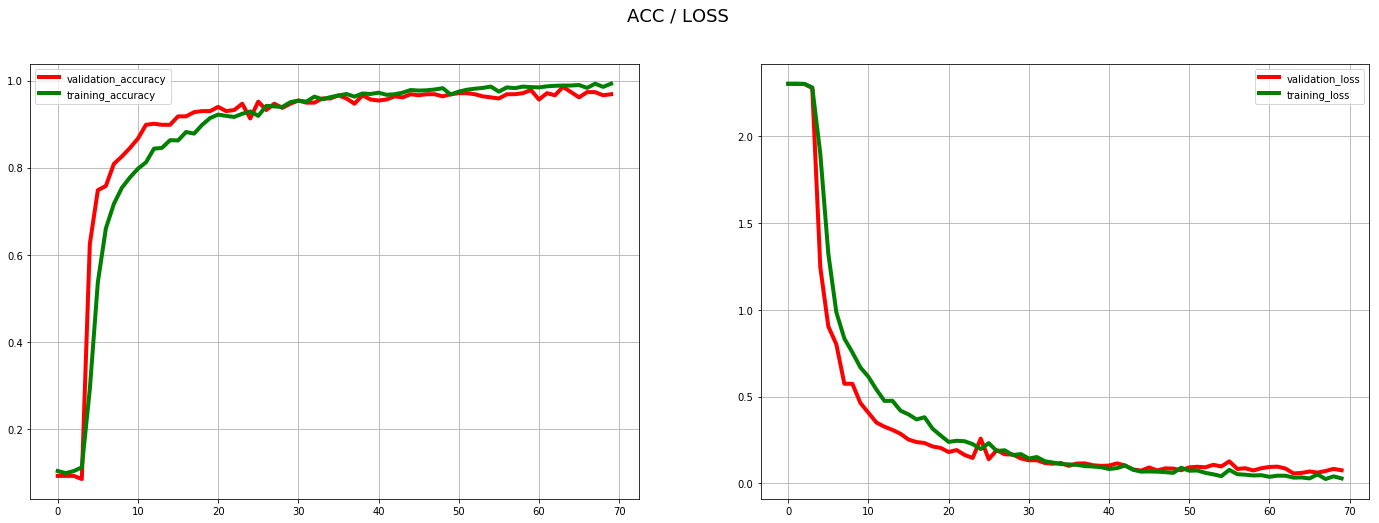

In [0]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(results.history["val_acc"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(results.history["acc"],label="training_accuracy",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(results.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(results.history["loss"],label="training_loss",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()

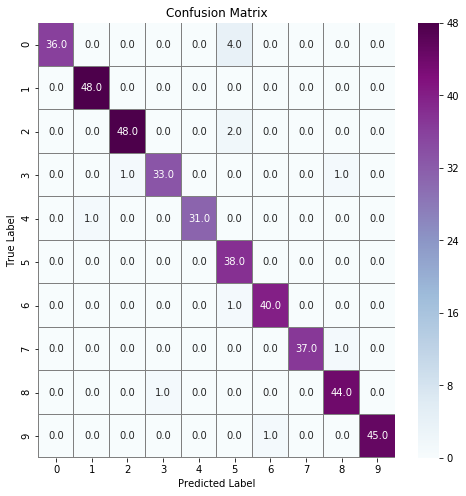

In [0]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = CNN_model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()